In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import glob 
import numpy as np

In [97]:
filenames = glob.glob("out/vicsek/10/Noise*txt")
filenames.sort(key = lambda x: float(x.split("/")[3].split("_")[1].split(".txt")[0]))

means = []
stds = []
etas = []
for filename in filenames:
    df = pd.read_csv(filename, sep=" ", header=None)
    # for each row in the df, calculate the mean and std of the velocities
    sum_mean = 0
    sum_std = 0
    count = 0
    for (_, row) in df.iterrows():
        count += 1
        sum_mean += np.mean(row)
        sum_std += np.std(row)
    
    Mean = sum_mean / count
    Std = sum_std / count
    means.append(Mean)
    stds.append(Std)
    eta = filename.split("/")[3].split(".txt")[0].split("_")[1]
    eta = eta.split(".txt")[0]
    etas.append(float(eta))




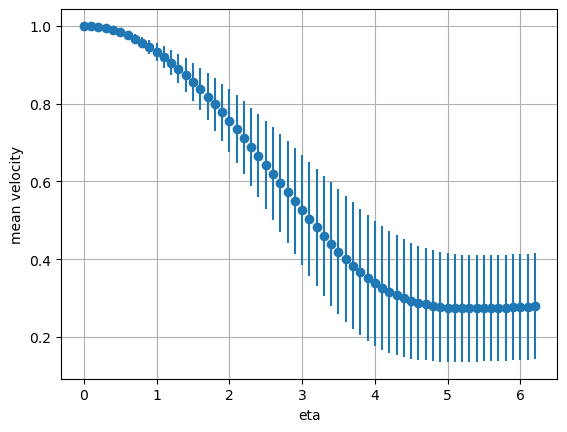

In [98]:
plt.figure()


plt.errorbar(etas, means, yerr=stds, fmt="o")
plt.xlabel("eta")
plt.ylabel("mean velocity")
plt.grid()
plt.show()
